In [17]:
import os

from scipy import sparse as sp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets 
from sklearn import metrics 
from sklearn import cluster
from sklearn.utils import sparsefuncs

<AxesSubplot:xlabel='x', ylabel='y'>

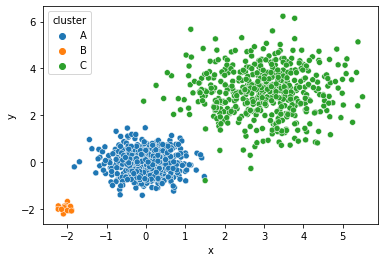

In [18]:
# Generate gaussian blobs simulating an imbalanced clustering setting
c_1 = np.random.normal(loc = 0, scale = 0.5, size = (500, 2))
c_2 = np.random.normal(loc = -2, scale = 0.1, size = (20, 2))
c_3 = np.random.normal(loc = 3, scale = 1, size = (500, 2))

# Plot the given results 
cluster_df = pd.DataFrame({
    "x" : np.concatenate((c_1[:, 0], c_2[:, 0], c_3[:, 0])),
    "y" : np.concatenate((c_1[:, 1], c_2[:, 1], c_3[:, 1])),
    "cluster": np.concatenate(
        (
            np.repeat("A", len(c_1)),
            np.repeat("B", len(c_2)),
            np.repeat("C", len(c_3))
        )
    )
})
sns.scatterplot(
    x = "x",
    y = "y",
    hue = "cluster",
    data = cluster_df
)


Silhouette value is: 0.516


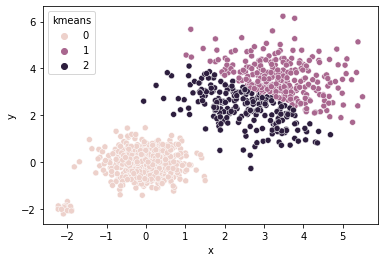

In [22]:
# Perform k-means clustering, calculate label-free metrics for 
# correct usage of k in the given scenario 
cluster_arr = np.array(cluster_df.iloc[:, 0:2])
kmeans_res = cluster.KMeans(n_clusters = 2).fit_predict(X = cluster_arr)
cluster_df["kmeans"] = kmeans_res
sns.scatterplot(
    x = "x",
    y = "y",
    hue = "kmeans",
    data = cluster_df
)
sil_val = metrics.silhouette_score(
    cluster_df.iloc[:, 0:2].values,
    cluster_df.kmeans
)
print("Silhouette value is: " + str(round(sil_val, 3)))

In [20]:
cluster_df.iloc[:, 0:2].values.shape

(1020, 2)